In [ ]:
Test Environment for Generative AI classroom labs

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price'],
      dtype='object')
        Unnamed: 0 Manufacturer    Category   Screen         GPU          OS  \
count   238.000000          238  238.000000      238  238.000000  238.000000   
unique         NaN           11         NaN        2         NaN         NaN   
top            NaN         Dell         NaN  Full HD         NaN         NaN   
freq           NaN           71         NaN      161         NaN         NaN   
mean    118.500000          NaN    3.205882      NaN    2.151261    1.058824   
std      68.848868          NaN    0.776533      NaN    0.638282    0.235790   
min       0.000000          NaN    1.000000      NaN    1.000000    1.000000   
25%      59.250000          NaN    3.000000      NaN    2.000000    1.000000   
50%     118.500000          NaN    3.000000      NaN    2.000000    1.0000

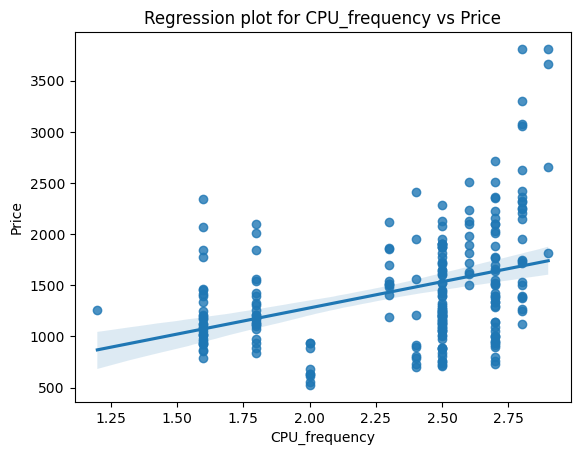

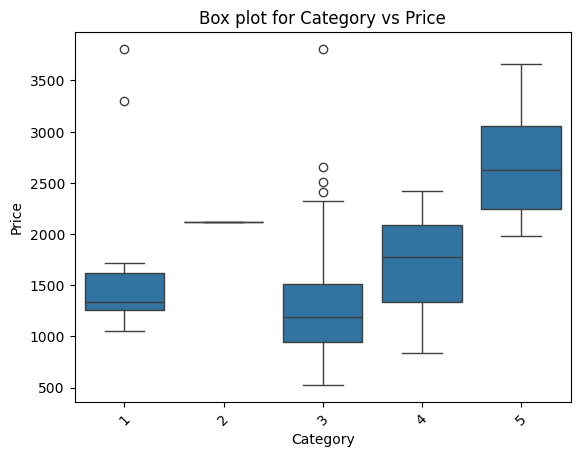

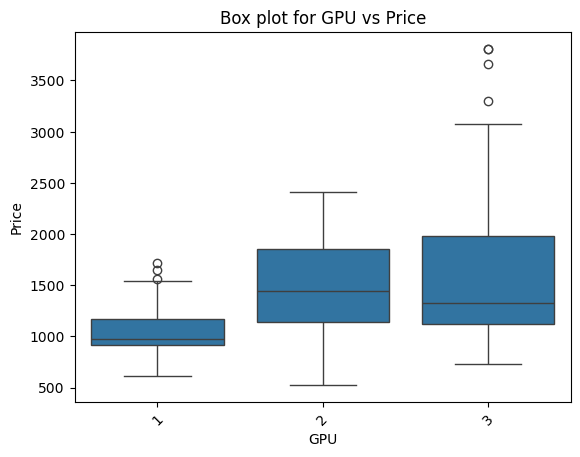

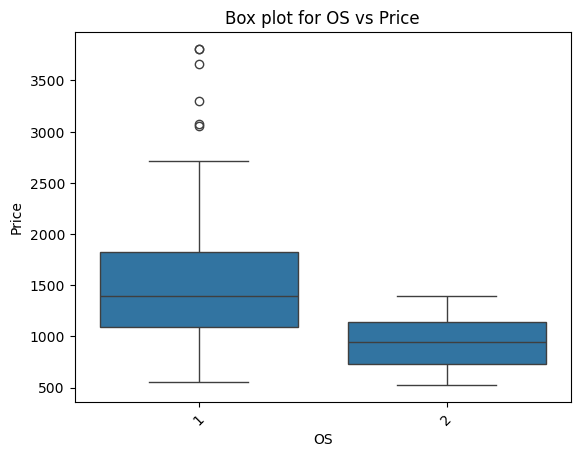

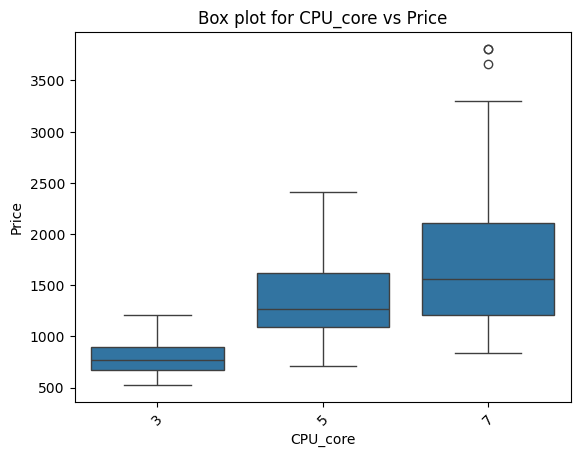

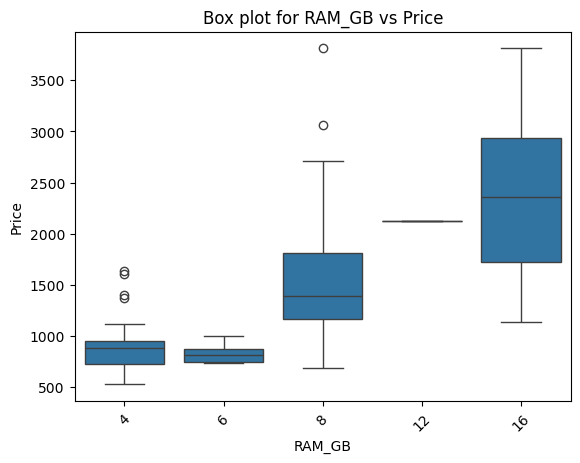

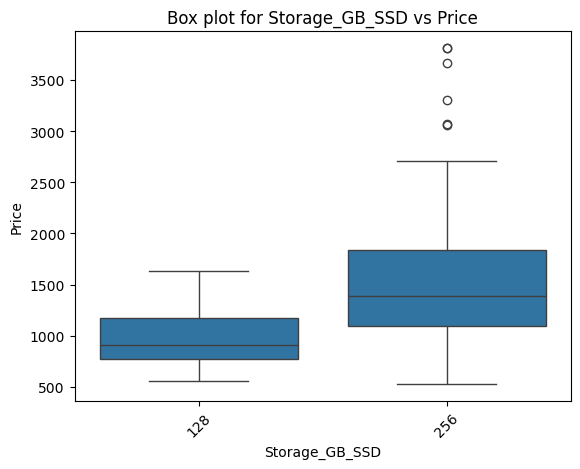

In [9]:
#Write a python code to perform the following actions.
#1. Import a data set from a CSV file, The headers for the data set must be in the first row of the CSV file.
#2. Generate the statistical description of all the features used in the data set. Include "object" data types as well.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'dataset.csv' 
data = pd.read_csv(file_path)

# Normalize column names
data.columns = data.columns.str.strip()

# Print column names to verify
print(data.columns)

# Generate statistical description
statistical_description = data.describe(include='all')
print(statistical_description)

#Write a Python code to perform the following actions.
#1. Create regression plots for the attributes "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
#2. Create box plots for the attributes "Category", "GPU", "OS", "CPU_core", "RAM_GB" and "Storage_GB_SSD" against the attribute "Price".

# Regression plots
regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    if attribute in data.columns:
        sns.regplot(x=attribute, y='Price', data=data)
        plt.title(f'Regression plot for {attribute} vs Price')
        plt.xlabel(attribute)
        plt.ylabel('Price')
        plt.show()
    else:
        print(f"Warning: Column '{attribute}' not found in dataset.")

# Box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    if attribute in data.columns:
        sns.boxplot(x=attribute, y='Price', data=data)
        plt.title(f'Box plot for {attribute} vs Price')
        plt.xlabel(attribute)
        plt.ylabel('Price')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Warning: Column '{attribute}' not found in dataset.")


In [ ]:
Write a Python code for the following.
1. Evaluate the correlation value, pearson coefficient and p-values for all numerical attributes against the target attribute "Price".
2. Don't include the values evaluated for target variable against itself.
3. Print these values as a part of a single dataframe against each individual attrubute.

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Load dataset
df = pd.read_csv('dataset.csv')

# Select numerical attributes
numerical_attributes = df.select_dtypes(include=[np.number])

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Initialize lists for Pearson Coefficient and P-values
pearson_coefficients = []
p_values = []

# Compute Pearson Coefficient and P-value for each numerical attribute
for column in numerical_attributes.columns:
    if column != 'Price':
        temp_data = df[[column, 'Price']].dropna()  # Drop NaNs from both columns together
        pearson_coefficient, p_value = pearsonr(temp_data[column], temp_data['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a DataFrame to store results
results_df = pd.DataFrame({
    'Attribute': correlation_values.index,
    'Correlation Value': correlation_values.values,
    'Pearson Coefficient': pearson_coefficients,
    'P-value': p_values
})

# Display results
print(results_df)

# Optionally, save to CSV
results_df.to_csv('correlation_results.csv', index=False)


        Attribute  Correlation Value  Pearson Coefficient       P-value
0      Unnamed: 0           0.321933             0.321933  3.851058e-07
1        Category           0.286243             0.286243  7.225696e-06
2             GPU           0.288298             0.288298  6.166950e-06
3              OS          -0.221730            -0.221730  5.696643e-04
4        CPU_core           0.459398             0.459398  7.912950e-14
5  Screen_Size_cm          -0.128233            -0.128233  5.009166e-02
6   CPU_frequency           0.366666             0.366666  5.502463e-09
7          RAM_GB           0.549297             0.549297  3.681561e-20
8  Storage_GB_SSD           0.243421             0.243421  1.489892e-04
9       Weight_kg          -0.050707            -0.050707  4.410942e-01


In [ ]:
Write a python code that performs the following actions.
1. Group the attributes "GPU", "CPU_core" and "Price", as available in a dataframe df
2. Create a pivot table for this group, assuming the target variable to be 'Price' and aggregation function as mean
3. Plot a pcolor plot for this pivot table.

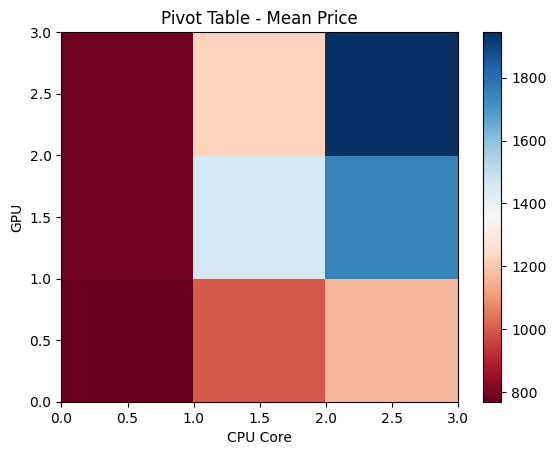

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data set as a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Group the attributes
grouped_data = df.groupby(['GPU', 'CPU_core'])['Price'].mean()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()